In [1]:
import pandas as pd
import numpy as np
from difflib import SequenceMatcher

In [2]:
lex = pd.read_csv('Hinglish_Profanity_List.csv', encoding='unicode_escape', header=None)

In [3]:
lex.head()

,0,1,2
0,badir,idiot,1
1,badirchand,idiot,1
2,bakland,idiot,1
3,bhadva,pimp,2
4,bhootnika,son of a witch,3


In [4]:
hate_lexicons = []

In [5]:
for word in lex[0]:
    hate_lexicons.append(word)

In [6]:
# hate_lexicons = set(hate_lexicons)

In [7]:
len(hate_lexicons)

209

In [8]:
tweets = pd.read_csv('final_data.csv')

In [9]:
tweets.head()

,Unnamed: 0,label,user,tweet,emb,text,lemmas
0,0,0,1615850780,929479629840281601,[ 0.00447152 -0.00207724 -0.00693714 -0.005786...,I am a young person and I am quite open to Pak...,i be muhajir aur mere lye sab se pehly pakista...
1,1,0,903075788756590593,929467030406758400,[ 0.00511213 0.0066199 -0.00406399 -0.001209...,<User> <User> Doctor Subhash ke PhD in Het Pol...,<user> <user> doctor sab sahi me ke phd in hat...
2,2,1,881096476616781825,929460995981901825,[-0.6831904 2.609242 2.6378176 2.580363...,"After the formation of the government, a singl...",<user> sarkar banne ke bad hindu hit me ek bhi...
3,3,1,3268145264,929460432498233344,[ 1.6771747 0.14684932 -0.8186511 1.882037...,Hate it when the test is not so frozen,hate it jab test ata ho phr bh acha na ho
4,4,0,763212669524467712,929459222697431040,[ 1.1214749 3.8859344 3.6560123 2.660346...,<user> One of the victims has been raped and r...,<user> ek dil ek jaan akal ke imitihaan kal kp...


In [10]:
sents = tweets['lemmas'].values

In [11]:
sents.shape

(3475,)

In [12]:
final_feat = []
ctr = 0
for sent in sents:
#     print(sent)
    words = sent.split()
    cur_vec = []
    for ix in range(len(hate_lexicons)):
        temp = False
        for word in words:
#             print(word)
            if word[0]=='p':
                continue
            if SequenceMatcher(a=hate_lexicons[ix], b=word).ratio()>0.85:
                temp = True
                ctr += 1
        if temp:
            cur_vec.append(1)
        else:
            cur_vec.append(0)
    final_feat.append(cur_vec) 
print(ctr)

KeyboardInterrupt: 

In [12]:
np.unique(tweets['label'],return_counts=True)

(array([0, 1]), array([2195, 1280]))

In [13]:
final_feat = np.array(final_feat)

NameError: name 'final_feat' is not defined

In [ ]:
final_feat.shape

In [ ]:
np.unique(final_feat, return_counts=True)

In [14]:
np.save('Abuse_Features_HEOT.npy',final_feat)

NameError: name 'final_feat' is not defined

In [13]:
final_feat = np.load('Abuse_Features.npy')

In [14]:
labels = tweets['label']

In [15]:
labels=labels.values

In [16]:
embs = np.load('deepwalk_embs_final.npy')

In [17]:
final_feat.shape, labels.shape, embs.shape

((3475, 209), (3475,), (3475, 64))

In [18]:
to_use = np.concatenate((final_feat,embs), axis=1)

In [19]:
to_use = final_feat

In [20]:
to_use.shape

(3475, 209)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
import os
from keras.utils import np_utils
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle

Using TensorFlow backend.


In [22]:
model = Sequential()
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add( Dropout(0.4) )
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

W0825 15:35:53.651453 4445287872 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0825 15:35:55.172620 4445287872 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [24]:
labels = np_utils.to_categorical(labels)
labels.shape

(3475, 2)

In [25]:
model.fit( to_use, labels, validation_split=0.2, shuffle=True, epochs=40 )

W0825 15:35:56.397886 4445287872 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 15:35:56.403171 4445287872 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 15:35:56.449167 4445287872 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 15:35:56.459233 4445287872 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updati

Train on 2780 samples, validate on 695 samples
Epoch 1/40
2780/2780 [==============================] - 1s 309us/step - loss: 0.6689 - acc: 0.6180 - val_loss: 0.6446 - val_acc: 0.6619
Epoch 2/40
2780/2780 [==============================] - 0s 113us/step - loss: 0.6574 - acc: 0.6295 - val_loss: 0.6377 - val_acc: 0.6604
Epoch 3/40
2780/2780 [==============================] - 0s 130us/step - loss: 0.6538 - acc: 0.6327 - val_loss: 0.6414 - val_acc: 0.6647
Epoch 4/40
2780/2780 [==============================] - 0s 101us/step - loss: 0.6495 - acc: 0.6399 - val_loss: 0.6499 - val_acc: 0.6561
Epoch 5/40
2780/2780 [==============================] - 0s 108us/step - loss: 0.6477 - acc: 0.6475 - val_loss: 0.6470 - val_acc: 0.6590
Epoch 6/40
2780/2780 [==============================] - 0s 125us/step - loss: 0.6446 - acc: 0.6435 - val_loss: 0.6478 - val_acc: 0.6547
Epoch 7/40
2780/2780 [==============================] - 0s 109us/step - loss: 0.6401 - acc: 0.6500 - val_loss: 0.6574 - val_acc: 0.6446
E

In [26]:
from sklearn.metrics import f1_score

In [27]:
from sklearn.metrics import classification_report

In [28]:
pred_val = model.predict(to_use[3000:])

In [29]:
pred_val = pred_val.argmax(axis=1)

In [30]:
true = labels[3000:,1]

In [31]:
final = pd.DataFrame()
final['true'] = true.astype(int)
final['pred'] = pred_val.astype(int)

In [32]:
print(classification_report(final['true'],final['pred']))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       323
           1       0.37      0.11      0.17       152

    accuracy                           0.65       475
   macro avg       0.53      0.51      0.48       475
weighted avg       0.58      0.65      0.59       475



In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(to_use)

KeyboardInterrupt: 

In [ ]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [ ]:
colors = ['red','green']

In [ ]:
len(labels)

In [ ]:
import matplotlib
plt.figure(figsize=(8, 8)) 
plt.scatter(x, y, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [36]:
train_df = pd.DataFrame()
train_df['content'] = sents
train_df['class'] = tweets['label']

In [37]:
train_df.head()

,content,class
0,i be muhajir aur mere lye sab se pehly pakista...,0
1,<user> <user> doctor sab sahi me ke phd in hat...,0
2,<user> sarkar banne ke bad hindu hit me ek bhi...,1
3,hate it jab test ata ho phr bh acha na ho,1
4,<user> ek dil ek jaan akal ke imitihaan kal kp...,0


In [38]:
import pandas as pd
import numpy as np
import json
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from nltk.tokenize import RegexpTokenizer
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.feature_extraction import text as sktext
from sklearn import preprocessing as skp
from keras import callbacks as kc
from keras import optimizers as ko
from keras import initializers, regularizers, constraints
from keras.engine import Layer
import keras.backend as K
from sklearn.metrics import f1_score
from keras.utils.vis_utils import model_to_dot
from keras import models
from keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.initializers import Constant
%matplotlib inline

Training data phrase length distribution


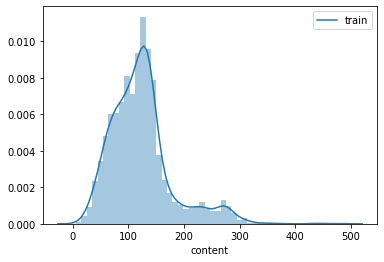

In [39]:
print("Training data phrase length distribution")
sns.distplot(train_df['content'].map(lambda ele: len(ele)), kde_kws={"label": "train"})

In [40]:
print('Most frequent sentence length in training:')
lens = train_df['content'].map(lambda ele: len(ele))
counts = np.bincount(lens)
print(np.argmax(counts))

Most frequent sentence length in training:
134


Testing data phrase length distribution


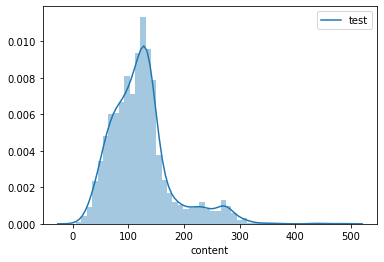

In [41]:
print("Testing data phrase length distribution")
sns.distplot(train_df['content'].map(lambda ele: len(ele)), kde_kws={"label": "test"})

In [42]:
test_df = train_df[3000:]
train_df = train_df[:3000]

Testing data phrase length distribution


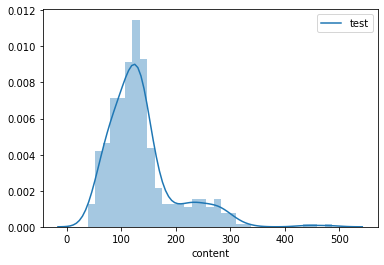

In [43]:
print("Testing data phrase length distribution")
sns.distplot(test_df['content'].map(lambda ele: len(ele)), kde_kws={"label": "test"})

In [44]:
print('Most frequent sentence length in testing:')
lens = test_df['content'].map(lambda ele: len(ele))
counts = np.bincount(lens)
print(np.argmax(counts))

Most frequent sentence length in testing:
134


In [45]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

In [46]:

## A dictionary to map the punctuations present in the text to relevant strings or symbols
punct_mapping = {"‘": "'", 
                 "₹": "e", 
                 "´": "'", 
                 "°": "", 
                 "€": "e", 
                 "™": "tm",
                 "√": " sqrt ",
                 "×": "x",
                 "²": "2",
                 "—": "-",
                 "–": "-",
                 "’": "'",
                 "_": "-",
                 "`": "'",
                 '“': '"',
                 '”': '"',
                 '“': '"',
                 "£": "e",
                 '∞': 'infinity',
                 'θ': 'theta',
                 '÷': '/',
                 'α': 'alpha',
                 '•': '.',
                 'à': 'a',
                 '−': '-',
                 'β': 'beta',
                 '∅': '',
                 '³': '3',
                 'π': 'pi',
                 ',':'',
                 '.':'',
                 ':':'',
                 '(':'',
                 ')':'',
                 '*':'',
                '"':'',
                '<':'',
                '>':''}

In [47]:
def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

## Function to remove special characters from the sentences (if any present)
def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [48]:
train_df.loc[:, 'content'] = train_df['content'].map(lambda text: clean_special_chars(text, punct, punct_mapping))
test_df.loc[:, 'content'] = test_df['content'].map(lambda text: clean_special_chars(text, punct, punct_mapping))

In [49]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [50]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [51]:
train_df.loc[:, 'content'] = train_df['content'].map(lambda text: clean_contractions(text, contraction_mapping))
test_df.loc[:, 'content'] = test_df['content'].map(lambda text: clean_contractions(text, contraction_mapping))

In [52]:
train_df.loc[:, 'content'] = train_df['content'].map(lambda text: text.lower())
test_df.loc[:, 'content'] = test_df['content'].map(lambda text: text.lower())

In [53]:
data = train_df.values
data_test = test_df.values

In [54]:
data.shape

(3000, 2)

In [55]:
X_train = data[:,0]
Y_train = data[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print ("-------------------------")
print (X_test[0], Y_test[0])
print (X_train[0], Y_train[0])

(3000,) (3000,) (475,) (475,)
-------------------------
user user eakdam sahi kha pta nahi kab hate ghi aesa soch kab badle gha yaha ka mohal aakhir kabtak sach se bage ghe 0
i be muhajir aur mere lye sab se pehly pakistan he agr ten lakh altaf jese leaders bh be zameen ki behurmati kren un sbko sar e aam phansi deni chahye proud to be a hashtag and hashtag 0


In [56]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")
lemmatizer = WordNetLemmatizer()

In [57]:
for ix in range(X_train.shape[0]):
    X_train[ix] = tokenizer.tokenize(X_train[ix])
    X_train[ix] = [lemmatizer.lemmatize(i) for i in X_train[ix]]
    
for ix in range(X_test.shape[0]):
    X_test[ix] = tokenizer.tokenize(X_test[ix])
    X_test[ix] = [lemmatizer.lemmatize(i) for i in X_test[ix]]

In [58]:

unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
## Length of the list of unique_words gives the no of unique words
print("Vocabulary Size:")
print(len(list(unique_words)))
print("Maximum length of sentence:")
print(len_max)

100%|██████████| 3000/3000 [00:00<00:00, 79442.59it/s]

Vocabulary Size:
11253
Maximum length of sentence:
72


In [59]:
len_max = 60

In [60]:
tokenizer_keras = Tokenizer(num_words=len(list(unique_words)))
tokenizer_keras.fit_on_texts(list(X_train))
X_train = tokenizer_keras.texts_to_sequences(X_train)
X_test = tokenizer_keras.texts_to_sequences(X_test)

## Padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
## Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.
X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)
print(X_train.shape,X_test.shape)

(3000, 60) (475, 60)


In [61]:
embeddings_index = dict()

In [62]:
f = open('./glove.6B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [63]:
vocab_size=len(list(unique_words))
embedding_matrix = np.zeros((vocab_size+1, 200))
for word, i in tokenizer_keras.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [64]:
print("Vocabulry Size:")
print(vocab_size)

Vocabulry Size:
11253


In [65]:
embed_size = 200
max_features = vocab_size + 1 

In [66]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, Flatten, GlobalAveragePooling1D, Reshape
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

In [67]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [87]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 10)
callback = [early_stopping]

#Model using Keras LSTM
model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(Bidirectional(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
model.add(Bidirectional(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
model.add(Attention(60))
# model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 300)           3375900   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60, 256)           439296    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 60, 256)           394240    
_________________________________________________________________
attention_2 (Attention)      (None, 256)               316       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               25700     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total para

In [88]:
checkpoint=ModelCheckpoint('model_self_embedding_final.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [89]:
output1 = model.layers[-2].output
# dense2 = Dense(300, activation='relu', name='layer_2')(output1)
input4 = Input(shape=(209,))
dense3 = Dense(50, activation='relu', name='layer_3')(input4)
merged = concatenate([output1, dense3])
pre_final = Dense(50, activation='relu', name='pre_final')(merged)
output = layers.Dense(2, activation="softmax", name="softmax_layer0")(pre_final)

In [90]:
model_fin = Model(inputs = [model.input, input4], outputs = [output])

In [91]:
X_full = np.concatenate((X_train, X_test))

In [92]:
Y_full = np.concatenate((Y_train, Y_test))

In [93]:
adam = ko.Nadam()
model_fin.compile(adam, loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy",])

file_path = "comb_model.hdf5"
check_point = kc.ModelCheckpoint(file_path, monitor = "val_sparse_categorical_accuracy", verbose = 1, save_best_only = True, mode = "max")
early_stop = kc.EarlyStopping(monitor = "val_sparse_categorical_accuracy", mode = "max", patience=10)
history = model_fin.fit([X_full,to_use],Y_full,validation_split=0.1, batch_size=500, epochs=20, callbacks = [check_point, early_stop])

# histories.append(np.max(np.asarray(history.history['val_sparse_categorical_accuracy'])))
# iterations.append(np.argmax(np.asarray(history.history['val_sparse_categorical_accuracy'])))

Train on 3127 samples, validate on 348 samples
Epoch 1/20
3127/3127 [==============================] - 58s 18ms/step - loss: 0.6713 - sparse_categorical_accuracy: 0.6134 - val_loss: 0.6312 - val_sparse_categorical_accuracy: 0.6782

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.67816, saving model to comb_model.hdf5
Epoch 2/20
3127/3127 [==============================] - 47s 15ms/step - loss: 0.6605 - sparse_categorical_accuracy: 0.6278 - val_loss: 0.6204 - val_sparse_categorical_accuracy: 0.6782

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.67816
Epoch 3/20
3127/3127 [==============================] - 44s 14ms/step - loss: 0.6211 - sparse_categorical_accuracy: 0.6537 - val_loss: 0.9202 - val_sparse_categorical_accuracy: 0.5833

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.67816
Epoch 4/20
3127/3127 [==============================] - 45s 14ms/step - loss: 0.5443 - sparse_categorical_accuracy: 0.7618 - val_loss: 0.7353 

In [75]:
# model_fin.load_weights('comb_model.hdf5')

In [100]:
pred_val = model_fin.predict([X_test, to_use[3000:]])

In [101]:
pred_val = pred_val.argmax(axis=1)

In [102]:
true = data_test[:,1]

In [103]:
final = pd.DataFrame()
final['true'] = true.astype(int)
final['pred'] = pred_val.astype(int)

In [104]:
f1_score(final['true'],final['pred'], average=None)

array([0.7880597 , 0.49285714])

In [105]:
print(classification_report(final['true'], final['pred']))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       323
           1       0.54      0.45      0.49       152

    accuracy                           0.70       475
   macro avg       0.65      0.64      0.64       475
weighted avg       0.69      0.70      0.69       475



In [ ]:
test_tweets = ['modi accha kaam kar raha hai', 'rahul gandhi ko kuch nhi aata', 'mera naam dhoni hai']

In [ ]:
eng_tweets = ['modi is doing well', 'rahul gandhi knows nothing', 'my name is dhoni']

In [116]:
x_check = ['he is a hidje hindu','he is a hidje muslim']

In [117]:
for ix in range(len(x_check)):
    x_check[ix] = tokenizer.tokenize(x_check[ix])
    x_check[ix] = [lemmatizer.lemmatize(i) for i in x_check[ix]]
    
x_check = tokenizer_keras.texts_to_sequences(x_check)
x_check = sequence.pad_sequences(x_check, maxlen=len_max)

In [118]:
to_use.shape

(3475, 209)

In [119]:
pred_val = model_fin.predict([x_check, np.zeros((2, 209))])

In [120]:
pred_val

array([[9.9978238e-01, 2.1762180e-04],
       [9.9978369e-01, 2.1626591e-04]], dtype=float32)